In [59]:
import pandas as pd 
data = pd.read_csv("student_scores.csv")
print(data.head(10))

     name  hours  score gender grades class
0   Aarav      8     76      M      A    9A
1    Riya      5     62      F      B    9B
2   Kabir     10     88      M      A   10A
3    Sana      4     55      F      C    9A
4  Vivaan      7     72      M      B   10B
5  Ishita      6     64      F      B    9C
6   Rohan      3     48      M      D    9B
7   Meera      9     90      F      A   11A
8  Aditya      2     38      M      F    9C
9   Kavya     11     93      F      A   12A


In [61]:
print('Columns',data.columns.to_list())

print('\nDataset info: \n',data.info())

print("\nDataset Completeness: \n",data.isnull().sum())

print("\n\nDataset Consistency: \n",data.dtypes)

Columns ['name', 'hours', 'score', 'gender', 'grades', 'class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB

Dataset info: 
 None

Dataset Completeness: 
 name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64


Dataset Consistency: 
 name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object


Describe dataset: 
            hours      score
count  92.000000  92.000000
mean    6.510870  68.836957
std     2.265336  15.692286
min     2.000000  35.000000
25%     5.000000  57.000000
50%     7.000000  70.000000
75%     8.000000  82.000000
max    11.000000  94.000000

Dataset Time-Keeping: 

No Timestamps

Dataset Bias: 
gender
F    0.51087
M    0.48913
Name: proportion, dtype: float64
grades
B    0.358696
A    0.326087
C    0.195652
D    0.086957
F    0.032609
Name: proportion, dtype: float64
class
9A     0.141304
10A    0.119565
9B     0.108696
9C     0.108696
10B    0.086957
11A    0.086957
10C    0.076087
12A    0.065217
12B    0.065217
11B    0.054348
12C    0.054348
11C    0.032609
Name: proportion, dtype: float64


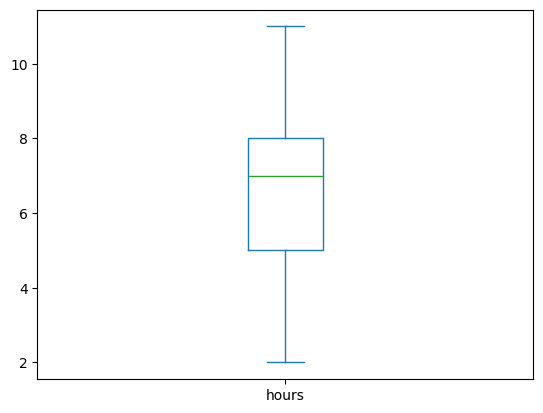

In [62]:
print("Describe dataset: \n", data.describe())
data['hours'].plot(kind='box')

print("\nDataset Time-Keeping: ")
print("\nNo Timestamps")

print("\nDataset Bias: ")
print(data['gender'].value_counts(normalize=True))
print(data['grades'].value_counts(normalize=True))
print(data['class'].value_counts(normalize=True))

# Dataset Specification: Student Performance

## 1. General Metadata
| Field | Details |
| :--- | :--- |
| **Dataset Name** | `student_scores.csv` (demo dataset) |
| **Description** | Contains student study behavior and academic performance data used to demonstrate Data Quality checks including Completeness, Consistency, Accuracy, Bias analysis, and basic feature engineering. |
| **Features** | `name`, `hours`, `score`, `gender`, `grades`, `class` |
| **Target Variable** | None (Exploratory dataset only) |
| **Number of Rows** | 92 |
| **Null Handling** | No missing values detected across any feature |
| **Transformations** | Label encoding applied to `class` -> `class_encoded`; datatype validation performed; value distribution and proportion analysis conducted for `gender`, `grades`, and `class` |
| **Owner** | Student / Notebook Author |
| **Last Updated** | 2025-12-19 |

---

## 2. Technical Schema (Pandas Info)
| # | Column | Non-Null Count | Dtype |
| :--- | :--- | :--- | :--- |
| 0 | `name` | 92 non-null | object |
| 1 | `hours` | 92 non-null | int64 |
| 2 | `score` | 92 non-null | int64 |
| 3 | `gender` | 92 non-null | object |
| 4 | `grades` | 92 non-null | object |
| 5 | `class` | 92 non-null | object |

---

## 3. Data Quality Summary
* **Completeness**: 0 missing values across all columns.
* **Consistency**: All datatypes (int64 and object) are verified and consistent.
* **Memory Usage**: 4.4+ KB.

In [63]:
categorical = data.select_dtypes(include='object').columns
numerical= data.select_dtypes(exclude='object').columns
print("Cat: \n", list(categorical))
print("Num: \n", list(numerical))

X = data[["hours"]]
y = data["score"]

Cat: 
 ['name', 'gender', 'grades', 'class']
Num: 
 ['hours', 'score']


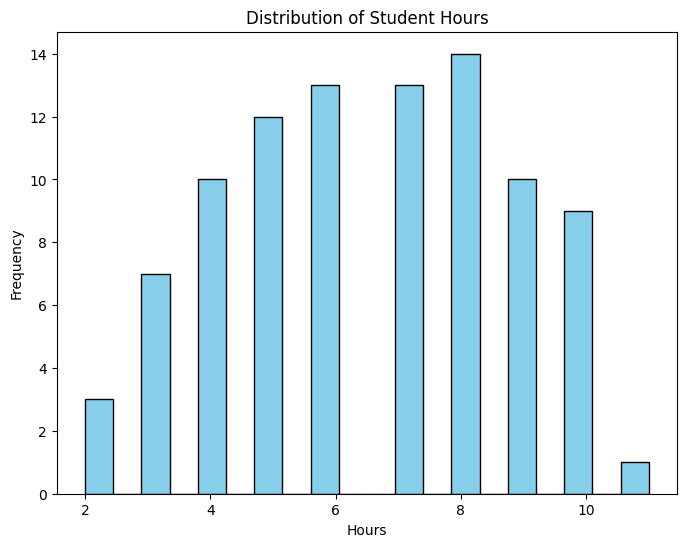

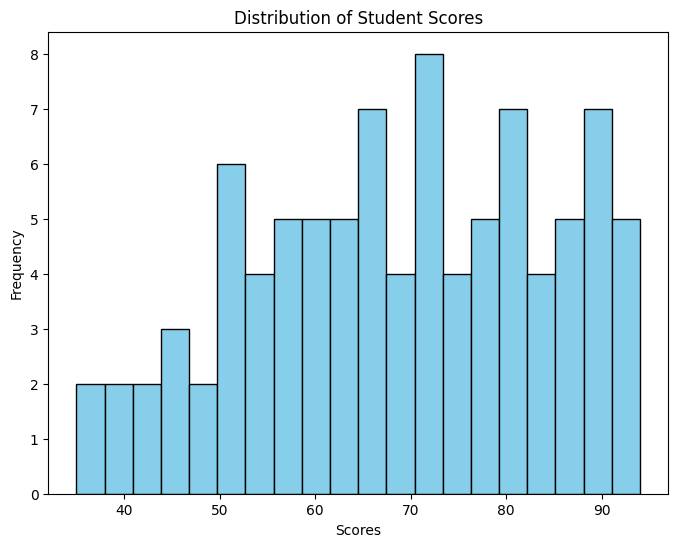

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(X, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Student Hours')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(y, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Student Scores')
plt.show()

In [65]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
    #stratify=y
)


In [66]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) 


print("Model Coefficient (Slope):", model.coef_[0])
print("Model Intercept:", model.intercept_)
#The coefficient indicates how much the score increases for every additional hour of study.

Model Coefficient (Slope): 6.804392044598464
Model Intercept: 24.617635980111494


In [67]:
y_pred = model.predict(X_test)
pred_data = {'Y_prediction': y_pred.round(2),
             'Y_test': y_test.reset_index(drop=True)}

prediction_table = pd.DataFrame(pred_data)
prediction_table

y_pred = model.predict([[1]])
print(y_pred)


[31.42202802]


c:\Users\ITCS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


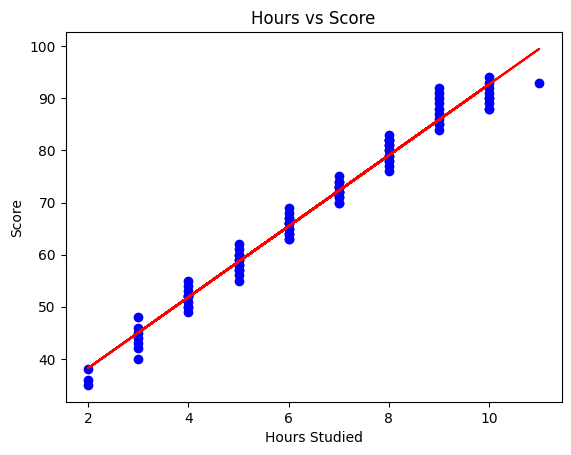

In [68]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

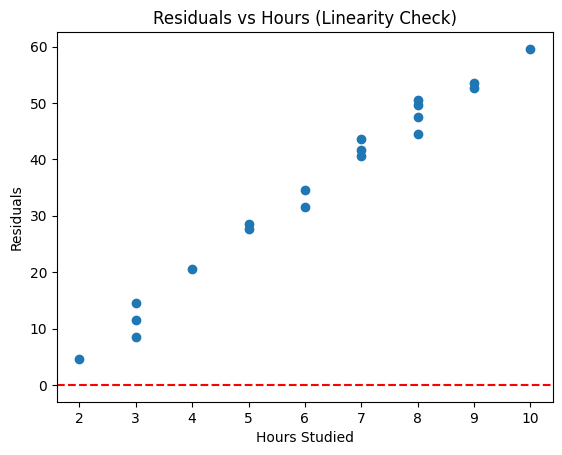

In [69]:

# Residuals
residuals = y_test - y_pred

# 1. Linearity check (Residuals vs X)
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Hours Studied")
plt.ylabel("Residuals")
plt.title("Residuals vs Hours (Linearity Check)")
plt.show()

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.3f}")

#RMSE represents the average error in score prediction.
#For example, an RMSE of 6 means predictions are off by ~6 marks on average.

MSE  : 3.02
RMSE : 1.74
R²   : 0.987
